In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("C:/Users/mohan/Desktop/DA Intern @ Apex Planet/raw_dataset.csv")

df.head()


,Transaction_ID,Customer_ID,Customer_Name,Gender,DOB,City,Product,Category,Quantity,Unit_Price,Transaction_Date,Payment_Method
0,T001,C001,Ram Kumar,Male,1995-06-15,Hyderabad,Laptop,Electronics,1,55000,2025-01-05,UPI
1,T002,C002,Anjali Singh,Female,1998-09-20,Delhi,Headphones,Electronics,2,1500,2025-01-06,Credit Card
2,T003,C003,Faizal Khan,Male,1990-11-11,Mumbai,Shoes,Fashion,1,2800,2025-01-06,UPI
3,T004,C004,Meera Devi,Female,2001-02-18,Bangalore,T-shirt,Fashion,3,600,2025-01-07,Debit Card
4,T005,C005,Srikanth Reddy,Male,1997-12-22,Hyderabad,Mobile Phone,Electronics,1,22000,2025-01-07,UPI


In [3]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction_ID    30 non-null     object
 1   Customer_ID       30 non-null     object
 2   Customer_Name     30 non-null     object
 3   Gender            30 non-null     object
 4   DOB               30 non-null     object
 5   City              30 non-null     object
 6   Product           30 non-null     object
 7   Category          30 non-null     object
 8   Quantity          30 non-null     int64 
 9   Unit_Price        30 non-null     int64 
 10  Transaction_Date  30 non-null     object
 11  Payment_Method    30 non-null     object
dtypes: int64(2), object(10)
memory usage: 2.9+ KB


,Transaction_ID,Customer_ID,Customer_Name,Gender,DOB,City,Product,Category,Quantity,Unit_Price,Transaction_Date,Payment_Method
count,30,30,30,30,30,30,30,30,30.000000,30.000000,30,30
unique,30,30,30,2,30,8,14,3,NaN,NaN,16,3
top,T001,C001,Ram Kumar,Male,1995-06-15,Hyderabad,Laptop,Electronics,NaN,NaN,2025-01-06,UPI
freq,1,1,1,16,1,6,4,18,NaN,NaN,2,15
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.366667,10923.333333,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.668675,17716.813237,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,200.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,750.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2150.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.750000,12150.000000,NaN,NaN


In [4]:
df.isnull().sum()


Transaction_ID      0
Customer_ID         0
Customer_Name       0
Gender              0
DOB                 0
City                0
Product             0
Category            0
Quantity            0
Unit_Price          0
Transaction_Date    0
Payment_Method      0
dtype: int64

In [5]:
df.duplicated().sum()

# Remove duplicates
df = df.drop_duplicates()


In [12]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [13]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], errors='coerce')
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')


In [14]:
df['Customer_Name'] = df['Customer_Name'].str.title()
df['Product'] = df['Product'].str.title()
df['City'] = df['City'].str.title()
df['Category'] = df['Category'].str.title()
df['Payment_Method'] = df['Payment_Method'].str.upper()


In [15]:
df['Customer_Age'] = datetime.now().year - df['DOB'].dt.year
df['Total_Revenue'] = df['Quantity'] * df['Unit_Price']
df['Month'] = df['Transaction_Date'].dt.month_name()


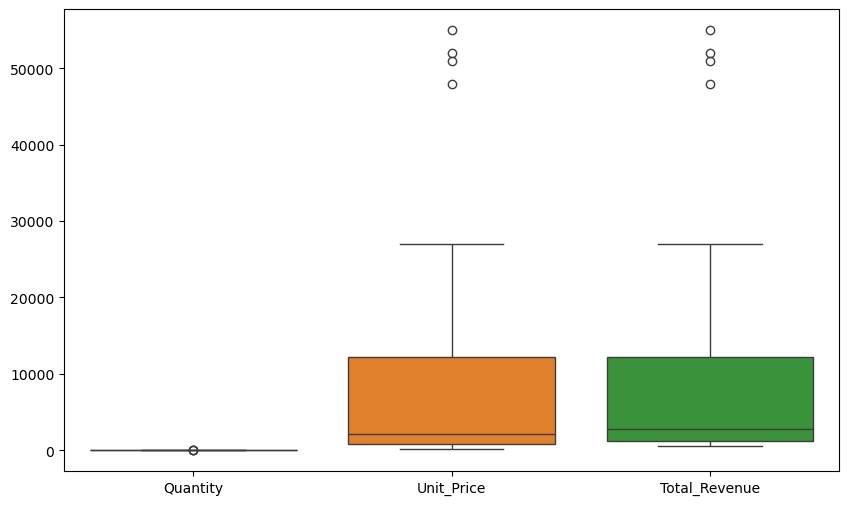

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Quantity','Unit_Price','Total_Revenue']])
plt.show()


In [18]:
df.to_csv("C:/Users/mohan/Desktop/DA Intern @ Apex Planet/TASK-1/cleaned_datset.csv", index=False)
